In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import subprocess

In [10]:
l = 90
b = 0
dist = 150
output = subprocess.run(['./run_NE2001.pl', str(l), str(b), str(dist), '-1', 'SCINTIME'], stdout=subprocess.PIPE).stdout.decode('utf-8')
output

'SCINTIME = 0.1416E+03 (s)         ScintTime @1GHz @100 km/s\n'

In [11]:
output.split()

['SCINTIME', '=', '0.1416E+03', '(s)', 'ScintTime', '@1GHz', '@100', 'km/s']

In [12]:
val = output.split()[2]
val

'0.1416E+03'

In [13]:
float(val)

141.6

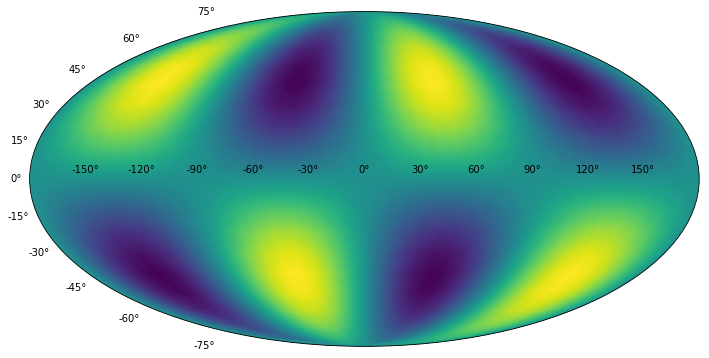

In [40]:
import numpy as np
import pylab as plt

ra = np.linspace(-np.pi, np.pi, 40)
dec= np.linspace(-np.pi/2, np.pi/2, 20)
X,Y = np.meshgrid(ra,dec)
Z = np.sin(X) * np.cos(X) * np.sin(Y) * np.cos(Y)

plt.figure(figsize=(12,8))
ax = plt.subplot(111, projection = 'mollweide')
ax.contourf(X,Y,Z,100)
# plt.grid(color='k')
# ax.contour(X,Y,Z,10,colors='k')

plt.show()

In [45]:
scint = np.empty((len(dec), len(ra)))
for y in range(len(dec)):
    for x in range(len(ra)):
        print(x, y)
        output = subprocess.run(['./run_NE2001.pl', str(ra[x]*180/np.pi), str(dec[y]*180/np.pi), str(dist), '-1', 'SCINTIME'], stdout=subprocess.PIPE).stdout.decode('utf-8')
        scint[y][x] = float(output.split()[2])
scint

0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 0
16 0
17 0
18 0
19 0
20 0
21 0
22 0
23 0
24 0
25 0
26 0
27 0
28 0
29 0
30 0
31 0
32 0
33 0
34 0
35 0
36 0
37 0
38 0
39 0
0 1
1 1
2 1
3 1
4 1
5 1
6 1
7 1
8 1
9 1
10 1
11 1
12 1
13 1
14 1
15 1
16 1
17 1
18 1
19 1
20 1
21 1
22 1
23 1
24 1
25 1
26 1
27 1
28 1
29 1
30 1
31 1
32 1
33 1
34 1
35 1
36 1
37 1
38 1
39 1
0 2
1 2
2 2
3 2
4 2
5 2
6 2
7 2
8 2
9 2
10 2
11 2
12 2
13 2
14 2
15 2
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 2
24 2
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 3
8 3
9 3
10 3
11 3
12 3
13 3
14 3
15 3
16 3
17 3
18 3
19 3
20 3
21 3
22 3
23 3
24 3
25 3
26 3
27 3
28 3
29 3
30 3
31 3
32 3
33 3
34 3
35 3
36 3
37 3
38 3
39 3
0 4
1 4
2 4
3 4
4 4
5 4
6 4
7 4
8 4
9 4
10 4
11 4
12 4
13 4
14 4
15 4
16 4
17 4
18 4
19 4
20 4
21 4
22 4
23 4
24 4
25 4
26 4
27 4
28 4
29 4
30 4
31 4
32 4
33 4
34 4
35 4
36 4
37 4
38 4
39 4
0 5
1 5
2 5
3 5
4 5
5 5
6 5
7 5
8 5
9 5
10 5
11 5


array([[5720.  , 5720.  , 5720.  , 5720.  , 5720.  , 5720.  , 5720.  ,
        5720.  , 5720.  , 5720.  , 5720.  , 5720.  , 5720.  , 5720.  ,
        5720.  , 5720.  , 5720.  , 5720.  , 5720.  , 5720.  , 5721.  ,
        5721.  , 5721.  , 5721.  , 5721.  , 5721.  , 5721.  , 5721.  ,
        5721.  , 5721.  , 5721.  , 5721.  , 5721.  , 5721.  , 5721.  ,
        5721.  , 5721.  , 5721.  , 5721.  , 5721.  ],
       [5686.  , 5686.  , 5712.  , 5708.  , 5702.  , 5724.  , 5715.  ,
        5706.  , 5695.  , 5685.  , 5673.  , 5662.  , 5652.  , 5642.  ,
        5633.  , 5597.  , 5590.  , 5585.  , 5556.  , 5554.  , 5529.  ,
        5531.  , 5534.  , 5514.  , 5520.  , 5527.  , 5536.  , 5545.  ,
        5531.  , 5541.  , 5551.  , 5585.  , 5595.  , 5604.  , 5612.  ,
        5619.  , 5651.  , 5656.  , 5658.  , 5687.  ],
       [5454.  , 5480.  , 5502.  , 5522.  , 5539.  , 5554.  , 5536.  ,
        5546.  , 5525.  , 5503.  , 5480.  , 5429.  , 5407.  , 5360.  ,
        5342.  , 5301.  , 5263.  , 5253.

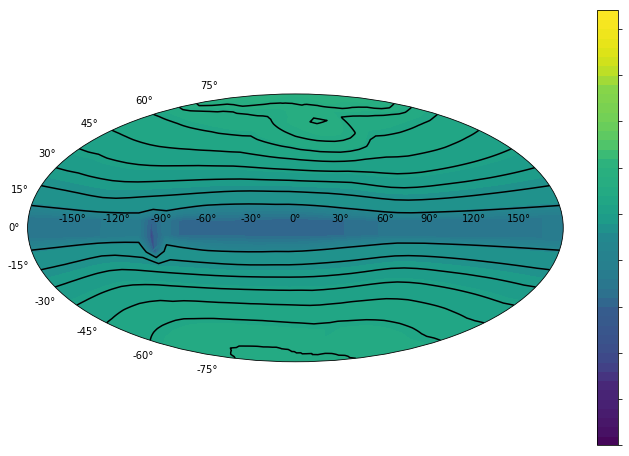

In [66]:
import numpy as np
import pylab as plt
from matplotlib import ticker, cm

ra = np.linspace(-np.pi, np.pi, 40)
dec= np.linspace(-np.pi/2, np.pi/2, 20)
X,Y = np.meshgrid(ra,dec)

fig = plt.figure(figsize=(12,8))
# ax = plt.subplot(111, projection = 'mollweide')
ax = plt.subplot(111, projection = 'aitoff')



# plt.grid(color='k')
ax.contour(X,Y,scint,10,colors='k')
c = ax.contourf(X,Y,scint,100,locator=ticker.LogLocator(subs='auto',numticks=10))
fig.colorbar(c)

plt.show()

In [32]:
X.shape

(20, 40)

In [33]:
Y.shape

(20, 40)

In [38]:
np.empty((20,40)).shape

(20, 40)

In [ ]:
import numpy as np
import pylab as plt
from matplotlib import ticker, cm
from tqdm import tqdm

ra = np.linspace(-np.pi, np.pi, 360)
dec= np.linspace(-np.pi/2, np.pi/2, 90)
X,Y = np.meshgrid(ra,dec)

scint = np.empty((len(dec), len(ra)))
for y in tqdm(range(len(dec))):
    print(y)
    for x in (range(len(ra))):
        output = subprocess.run(['./run_NE2001.pl', str(ra[x]*180/np.pi), str(dec[y]*180/np.pi), str(dist), '-1', 'SCINTIME'], stdout=subprocess.PIPE).stdout.decode('utf-8')
        scint[y][x] = float(output.split()[2])
scint

In [ ]:
fig = plt.figure(figsize=(12,8))
# ax = plt.subplot(111, projection = 'mollweide')
ax = plt.subplot(111, projection = 'aitoff')



# plt.grid(color='k')
ax.contour(X,Y,scint,10,colors='k')
c = ax.contourf(X,Y,scint,100,locator=ticker.LogLocator(subs='auto',numticks=10))
fig.colorbar(c)

plt.show()